Importamos las librerías a usar:
- **TensorFlow**: Diseño y ejecución de redes neuronales.
- **Scikit-Learn**: Machine learning. Preparación de datos y visualización de los resultados.
- **OpenCV2**: Gestor de imágenes.
- **MatPlotLib**: Visualización de datos.
- **NumPy**: Manejo de datos.
- **Pandas**: Manejo de conjuntos de datos.

E importamos el dataset, que consiste en un conjunto de radiografías cerebrales junto a las máscaras que indican la localización de los tumores. Por una parte tenemos las imágenes y por otro una tabla con la localización de las radiografías, sus máscaras corresponientes y si contienen tumor o no.

In [1]:
# conda create -n ISDL29 tensorflow ipython ipykernel
# pip install matplotlib
# conda install opencv-python / conda install glib=2.51.0 -y
# conda install pandas
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import cv2

In [2]:
from zipfile import ZipFile
import matplotlib.pyplot as plt # conda install matplotlib
import pandas as pd
import shutil
import os
ROOT=os.getcwd()
BRAINPATH=os.path.join(ROOT,'Brain_MRI')
ZIPPATH=os.path.join(ROOT,'data.zip')
DATAPATH=os.path.join(BRAINPATH,'data_mask.csv')
TRAINPATH=os.path.join(ROOT,'data','train.csv')
TESTPATH=os.path.join(ROOT,'data','test.csv')

if 'Brain_MRI' not in os.listdir():
    with ZipFile(os.path.join(ROOT,'data.zip')) as zfile:
        for file in zfile.namelist():
            if file.startswith('Healthcare AI Datasets/Brain_MRI'):
                zfile.extract(file)
    shutil.move(os.path.join(ROOT,'Healthcare AI Datasets/Brain_MRI'),ROOT)
    os.rmdir('Healthcare AI Datasets')

### Visualización del dataset

In [3]:
train=pd.read_csv(TRAINPATH)
test=pd.read_csv(TESTPATH)
train

,Unnamed: 0,patient_id,image_path,mask_path,mask
0,3579,TCGA_DU_7300_19910814,TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_46...,TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_46...,0
1,300,TCGA_DU_5851_19950428,TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_3.tif,TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_3_...,0
2,1871,TCGA_FG_5962_20000626,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_18...,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_18...,0
3,3585,TCGA_DU_7300_19910814,TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_46...,TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_46...,1
4,194,TCGA_CS_6666_20011109,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_2.tif,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_2_...,0
...,...,...,...,...,...
3884,749,TCGA_DU_6400_19830518,TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_7.tif,TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_7_...,0
3885,1031,TCGA_DU_7018_19911220,TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_10...,TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_10...,0
3886,1251,TCGA_DU_7008_19830723,TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_12...,TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_12...,0
3887,404,TCGA_CS_6290_20000917,TCGA_HT_7855_19951020/TCGA_HT_7855_19951020_4.tif,TCGA_HT_7855_19951020/TCGA_HT_7855_19951020_4_...,0


In [4]:
test

,Unnamed: 0,patient_id,image_path,mask_path,mask
0,1297,TCGA_DU_8163_19961119,TCGA_HT_8106_19970727/TCGA_HT_8106_19970727_12...,TCGA_HT_8106_19970727/TCGA_HT_8106_19970727_12...,1
1,1189,TCGA_DU_7013_19860523,TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_11...,TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_11...,0
2,1670,TCGA_DU_8165_19970205,TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_16...,TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_16...,0
3,2771,TCGA_HT_7692_19960724,TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_27...,TCGA_FG_6688_20020215/TCGA_FG_6688_20020215_27...,1
4,1015,TCGA_DU_7018_19911220,TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_10...,TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_10...,0
5,2117,TCGA_FG_6690_20020226,TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_20...,TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_20...,0
6,985,TCGA_DU_6405_19851005,TCGA_DU_7304_19930325/TCGA_DU_7304_19930325_9.tif,TCGA_DU_7304_19930325/TCGA_DU_7304_19930325_9_...,0
7,2029,TCGA_FG_6689_20020326,TCGA_DU_A5TY_19970709/TCGA_DU_A5TY_19970709_19...,TCGA_DU_A5TY_19970709/TCGA_DU_A5TY_19970709_19...,0
8,3357,TCGA_HT_A5RC_19990831,TCGA_DU_8167_19970402/TCGA_DU_8167_19970402_37...,TCGA_DU_8167_19970402/TCGA_DU_8167_19970402_37...,0
9,1113,TCGA_DU_7014_19860618,TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_11...,TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_11...,1


A continuación se muetras las funciones que preparan los datos.

In [7]:
import numpy as np

imsize=256

def balance_dataV2(data):
    '''Equilibra los datos generando imágenes con tumor a partir de las ya presentes
    volteándolas sobre el eje y.
    Para hacerlo, genera un campo en la tabla de datos indicando si es un dato generado a voltear.'''
    counts=data['mask'].value_counts()
    handicap=counts[0]-counts[1]
    data_healthy = data.query('mask == 0')
    data_unhealthy = data.query('mask == 1')
    data_unhealthy_flipped=data_unhealthy.sample(n=handicap)
    data_healthy['flip']=0
    data_unhealthy['flip']=0
    data_unhealthy_flipped['flip']=1
    return pd.concat([data_healthy, data_unhealthy,data_unhealthy_flipped]).sample(frac=1).reset_index()

def getImage(path,flip,imsize):
    '''Lee las imágenes a partir de los directorios de la tabla de datos.
    Params:
    - path: directorio de la imagen.
    - flip: Si corresponda a un dato generado que se tiene que voltear. (0 o 1).
    - imsize: Tamaño de la imagen.
    Retorna:
    image: tensor numpy de la imagen.'''
    image=cv2.imread(path)
    image=cv2.resize(image,(imsize,imsize),interpolation=cv2.INTER_NEAREST)
    if flip==1:
        image=cv2.flip(image,1)
    return image

def getDataS1(data,balance=False):
    '''Genera los datos de entrada al algoritmo.
    Params:
    data: datos a generar.
    Retorna:
    X: Los tensores correspondientes a las radiografías (sin los tumores marcados).
    y: Si la imágen contiene tumor o no (0 o 1).'''
    if balance==True:
        data=balance_dataV2(data)
    else:
        data['flip']=0
    rawX=data[['image_path','flip']].apply(lambda x: getImage(os.path.join(BRAINPATH,x['image_path']),x['flip'],imsize),axis=1)
    X = np.array(list(rawX))
    y = data['mask'].values
    return (X,y)

### División de los datos de entrenamiento entre entrenamiento y validación.

In [8]:
X_train, y_train= getDataS1(train)

X_test, y_test=getDataS1(test)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())
counts=pd.Series(y_train).value_counts()
weights={i:counts.iloc[0]/v for i,v in zip(counts.index,counts.values)}
print(weights)

0    2534
1    1355
dtype: int64
0    22
1    18
dtype: int64
{0: 1.0, 1: 1.870110701107011}


### Entrenamiento de los datos.

La resnet que utilizamos tiene 2 partes:
- Una parte convolucional preentrenada con el conjunto de imágenes 'ImageNet'.
- Una parte densa entrenable con dropout añadido para que tenga que reaprender caracterísiticas en cada época, reduciendo así la probabilidad de overfitting.

Y su proceso de entrenamiento tiene las siguientes caracterísicass:
- Se tienen más en cuenta las imágenes con tumor, ya que son menos frecuentes.
- El ritmo de aprendizaje disminuye progresivamente para evitar overfitting en las últimas épocas.

Finalmente, se guardan los modelos en archivos .h5 .

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Resizing, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.image import resize
from tensorflow.keras.layers import Dense, Flatten, Lambda, Input, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives

METRICS=['accuracy',
         TruePositives(name='tp'),
         FalseNegatives(name='fn'),
         TrueNegatives(name='tn'),
         FalsePositives(name='fp')
         ]
preresnet=Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x))

resnet=ResNet50(include_top=False,weights='imagenet',input_shape=(imsize,imsize,3))

for layer in resnet.layers: # Indicamos que no se entrene la parte convolucional de la resnet.
    layer.trainable = False

model=Sequential(layers=[Input(shape=(imsize,imsize,3)),
                 preresnet,
                 resnet,
                 Flatten(),
                 Dropout(rate=0.2,seed=2022),
                 Dense(units=128,activation='relu'),
                 Dropout(rate=0.1,seed=2022),
                 Dense(units=92,activation='relu'),
                 Dropout(rate=0.1,seed=2022),
                 Dense(units=48,activation='relu'),
                 Dense(units=1,activation='sigmoid')]
                )


model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=METRICS)
model.summary()

earlystop = EarlyStopping(monitor='val_loss', patience=4)
                             
savebest=ModelCheckpoint(filepath=os.path.join(ROOT,'resnet_best.h5'),monitor="val_loss",save_best_only=True)

def schedule(epoch,lr):
    if epoch in [4,8,12]:
        return lr*0.5
    else:
        return lr
    
lrschedule=LearningRateScheduler(schedule)

history = model.fit(X_train, np.array(y_train), epochs=15, shuffle=True,
                    validation_split=0.05, class_weight=weights, callbacks=[earlystop,lrschedule,savebest], batch_size=64)

model.save('resnet_last.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_3 (Dropout)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 92)               

2022-07-30 15:10:49.674584: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 726269952 exceeds 10% of free system memory.


58/58 [==============================] - 342s 6s/step - loss: 3.1050 - accuracy: 0.7241 - tp: 942.0000 - fn: 348.0000 - tn: 1733.0000 - fp: 671.0000 - val_loss: 0.5156 - val_accuracy: 0.8000 - val_tp: 59.0000 - val_fn: 6.0000 - val_tn: 97.0000 - val_fp: 33.0000 - lr: 0.0010
Epoch 2/15
58/58 [==============================] - 336s 6s/step - loss: 0.5375 - accuracy: 0.8525 - tp: 1113.0000 - fn: 177.0000 - tn: 2036.0000 - fp: 368.0000 - val_loss: 0.3061 - val_accuracy: 0.8308 - val_tp: 55.0000 - val_fn: 10.0000 - val_tn: 107.0000 - val_fp: 23.0000 - lr: 0.0010
Epoch 3/15
58/58 [==============================] - 338s 6s/step - loss: 0.3190 - accuracy: 0.8912 - tp: 1163.0000 - fn: 127.0000 - tn: 2129.0000 - fp: 275.0000 - val_loss: 0.2376 - val_accuracy: 0.8974 - val_tp: 61.0000 - val_fn: 4.0000 - val_tn: 114.0000 - val_fp: 16.0000 - lr: 0.0010
Epoch 4/15
58/58 [==============================] - 336s 6s/step - loss: 0.2201 - accuracy: 0.9364 - tp: 1202.0000 - fn: 88.0000 - tn: 2257.0000 - f

A continuación comparamos el rendimiento de la red en la última época y en la que tenía la menor función de perdida en el set de validación.

2/2 [==============================] - 4s 600ms/step


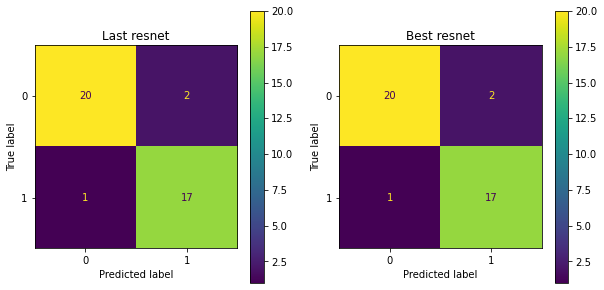

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
predlast=load_model('resnet_last.h5').predict(X_test).round(0).ravel().astype('int')
predbest=load_model('resnet_best.h5').predict(X_test).round(0).ravel().astype('int')
real=y_test.ravel()
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(real, predlast,labels=(0,1),ax=ax[0])
ConfusionMatrixDisplay.from_predictions(real, predbest,labels=(0,1),ax=ax[1])
ax[0].set_title('Last resnet')
ax[1].set_title('Best resnet')
fig.savefig('best:vs_last.png')
plt.show()

Las 2 redes muestran un rendimiento prácticamente idéntico.

In [11]:
load_model('resnet_last.h5').evaluate(X_test,y_test)

2/2 [==============================] - 4s 605ms/step - loss: 0.1737 - accuracy: 0.9250 - tp: 17.0000 - fn: 1.0000 - tn: 20.0000 - fp: 2.0000


[0.17369771003723145, 0.925000011920929, 17.0, 1.0, 20.0, 2.0]

In [12]:
load_model('resnet_best.h5').evaluate(X_test,y_test)

2/2 [==============================] - 5s 610ms/step - loss: 0.1648 - accuracy: 0.9250 - tp: 17.0000 - fn: 1.0000 - tn: 20.0000 - fp: 2.0000


[0.1647888422012329, 0.925000011920929, 17.0, 1.0, 20.0, 2.0]

In [13]:
fig.savefig('best_vs_last.png')